<a href="https://colab.research.google.com/github/andhinirs/PostTest2_DataMining/blob/main/A1_2109116005_PostTest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [184]:
# import library yang diperlukan 
import pandas as pd
import seaborn as sns

In [185]:
df = pd.read_excel("dataset_market_basket.xlsx",sheet_name="Sheet1")
# baca dataset
df # Lihat Data Tabular item

,whole milk,pastry,salty snack,sausage,semi-finished bread,youghrt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurtr,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
# untuk melihat nama kolom atau item yang ada
df.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread', 'youghrt', 'soda', 'pickled vegetables', 'canned beer', 'misc. beverages', 'hygiene articles', 'rolls/buns',
       'frankfurtr', 'whipped/sour cream', 'curd ', 'beef', 'white bread', 'butter', 'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar', 'butter milk', 'specialty chocolate',
       'frozen meals', 'dental care', 'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [187]:
# 1 item set
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
youghrt                1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurtr             2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [188]:
# 2 Item set
# library ini buat kombinasi per item
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'youghrt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurtr'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd '),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 (

In [189]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  # len syntax penentu untuk memfilter dengan index = 1 atau > 0
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru
# menghasilkan data baru yang udah difilter

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'youghrt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'youghrt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'youghrt'),
 ('youghrt', 'whole milk'),
 ('youghrt', 'sausage'),
 ('youghrt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurtr'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('

In [190]:
hitung = {} #Ganti dictionary
for rule in rule_baru:
  # len syntax untuk menghitung ada berapa kali banyak nya kombinasi yang muncul
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'youghrt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'youghrt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'youghrt')": 1,
 "('youghrt', 'whole milk')": 1,
 "('youghrt', 'sausage')": 1,
 "('youghrt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurtr')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,
 "

In [191]:
# Melihat banyak transaksi
len(df) # untuk melihat banyak nya data 

19

##**Daftar Support**

In [194]:
# Menghitung list support

print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

---
('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'youghrt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage', 'whole milk') support = 10.526315789473683%
('sausage', 'semi-finished bread') support = 5.263157894736842%
('sausage', 'youghrt') support = 5.263157894736842%
('sausage', 'hygiene articles') support = 5.263157894736842%
('sausage', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whol

##**Daftar Confidance**

In [195]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage  Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->youghrt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage->whole milk  Confidence = 50.0%
sausage->semi-finished bread  Confidence = 25.0%
sausage->youghrt  Confidence = 25.0%
sausage->hygiene articles  Confidence = 25.0%
sausage->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage  Confidence = 100.0%
semi-finished bread->youghrt  Confidence = 100.0%
youghrt->whole milk  Confidence = 100.0%
youghrt->sausage  Confidence = 100.0%
youghrt->semi-finished bread  Confidence = 100.0%
s

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

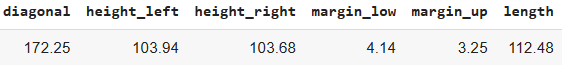
<!-- 1412 -->

In [196]:
df = pd.read_csv("deteksi_uang_palsu.csv")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [197]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
# import library
import numpy as np

# buat dataframe baru
databaru = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df['jarak'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# menampilkan tabel jarak
print('ini tabel jarak : ')
print(df['jarak'])

ini tabel jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: jarak, dtype: float64


In [198]:
# kolom jarak 
pd.set_option('display.max_columns', None)

# atur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length     jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

In [199]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
# mengurutkan data dari kecil ke besar
sorted_data = df.sort_values('jarak')

# menentukan nilai k
k = int(np.sqrt(len(df)))

# menentukan data terdekat
data_terdekat = sorted_data.head(k)

# menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length     jarak
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


In [200]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak
print("Berdasarkan jawaban nomor 2 didapatkan hasil prediksi : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','jarak'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = databaru

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasil prediksinya berdasarkan label terbanyak adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2 didapatkan hasil prediksi : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasil prediksinya berdasarkan label terbanyak adalah : True


# (3) Analisis

> Nama : Andhini Rahmitasari

> Nim : 2109116005


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## **Business Understanding**

Dalam konteks business understanding, dataset Hepatitis C dapat memberikan informasi yang berharga bagi organisasi dan perusahaan di sektor kesehatan dan farmasi. Informasi dari dataset ini dapat membantu dalam pengembangan dan peningkatan perawatan pasien yang terinfeksi virus Hepatitis C (HCV), serta memahami faktor risiko yang terkait dengan penyebaran virus ini.

Dengan dataset ini bertujuan untuk memprediksi apakah pasien kemungkinan terkena penyakit Hepatitis C berdasarkan parameter input data pasien seperti jenis darah, usia, dan jenis kelamin. Serta untuk kumpulan data berisi nilai laboratorium donor darah seperti ALB, ALP, ALT, AST, dan BIL. Hal ini dapat membantu dalam merancang strategi pencegahan dan pengobatan yang lebih efektif, serta memperkirakan biaya perawatan pasien dengan Hepatitis C.

## **Data Understanding**

Sumber dataset didapatkan melalui : 

fedesoriano. (2021). Hepatitis C Prediction Dataset. Retrieved [Date Retrieved] from : https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset

##### **Collect Data**

In [201]:
# import library yang diperlukan
import pandas as pd 
import seaborn as sns
import plotly.express as px
import numpy as np

In [202]:
df2 = pd.read_csv("HepatitisCdata.csv") # Menaruh dataset dalam sebuah variabel df
df2  #Menampilkan data
df_baru = df2.drop(columns = ["Unnamed: 0"])
df_baru

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [203]:
# Menampilkan daftar kolom yang ada 
print("Daftar kolom :")
for col in df_baru.columns:
  print(col)

Daftar kolom :
Category
Age
Sex
ALB
ALP
ALT
AST
BIL
CHE
CHOL
CREA
GGT
PROT


Category: The target feature. values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'

Age: age of the patient in years

Sex: sex of the patient ('f'=female, 'm'=male)

ALB: amount of albumin in patient's blood

ALP: amount of alkaline phosphatase in patient's blood

ALT: amount of alanine transaminase in patient's blood

AST: amount of aspartate aminotransferase in patient's blood

BIL: amount of bilirubin in patient's blood

CHE: amount of cholinesterase in patient's blood

CHOL: amount of cholesterol in patient's blood

CREA: amount of creatine in patient's blood

GGT: amount of gamma-glutamyl transferase in patient's blood

PROT: amount of protien in patient's blood

Penjelasan kolom yang ada : 

Kolom 1-3 merupakan kolom yang merujuk pada data pasien yaitu category, age, dan sex. 
Kemudian untuk kolom seterusnya 4-13 merujuk pada hasil laboratorium darah yaitu ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, dan PROT. 

In [204]:
# Menampilkan info dataset 
(df_baru.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [205]:
# Menampilkan hasil statistik dari kolom bertipe angka
df_baru.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


### **Explore Data**

##### Visualisasi Comparison

<Axes: xlabel='count', ylabel='Category'>

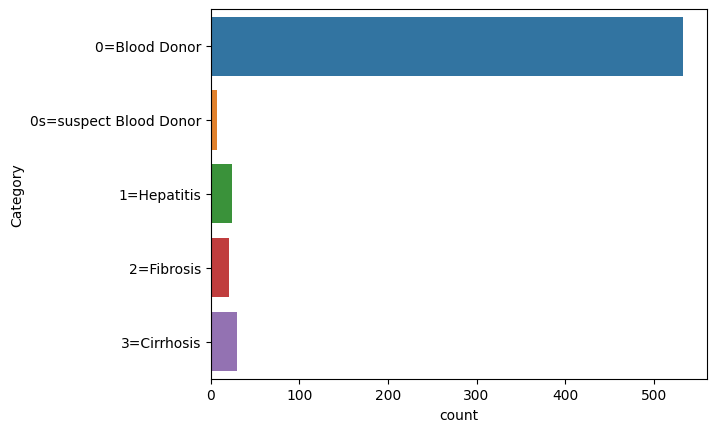

In [206]:
# Menampilkan visualisasi berapa banyak category berdasarkan kategori-kategorinya 
sns.countplot(data=df_baru,y="Category") #Variabel sns digunakan untuk mengakses fungsi-fungsi yang tersedia di librari seaborn

<Axes: xlabel='count', ylabel='Category'>

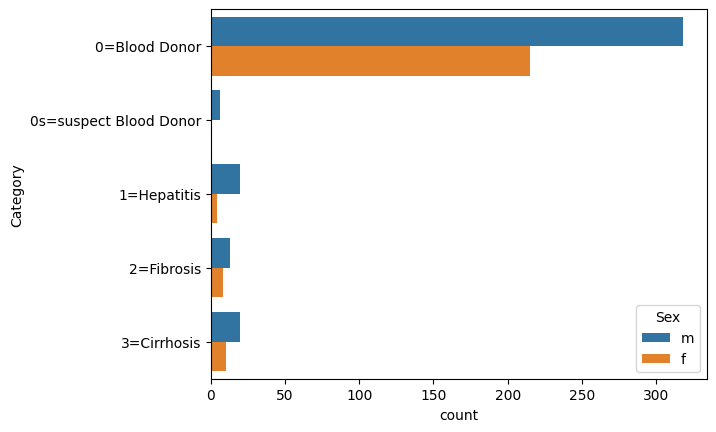

In [207]:
# Menampilkan visualisasi berapa banyak jenis kategori berdasarkan jenis kelaminnya
sns.countplot(data=df_baru, y="Category", hue="Sex")

##### Visualisasi Distribution

<Axes: xlabel='Age', ylabel='Count'>

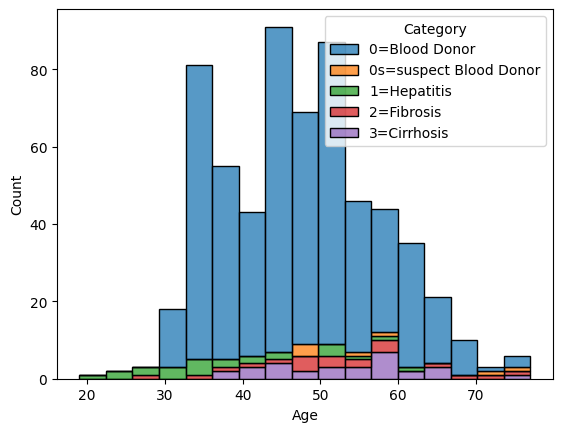

In [208]:
# Membuat histogram persebaran data umur dengan kategori 
sns.histplot(x="Age", data=df_baru, hue="Category", multiple="stack")

<Axes: xlabel='Sex', ylabel='Count'>

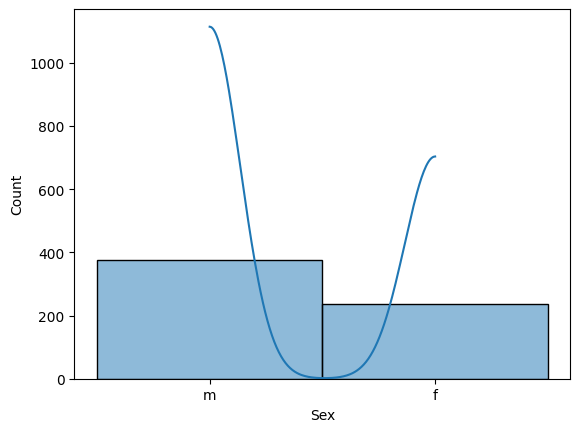

In [209]:
# Membuat histogram credit limit
sns.histplot(data=df_baru, x="Sex", kde=True)

<Axes: xlabel='Age'>

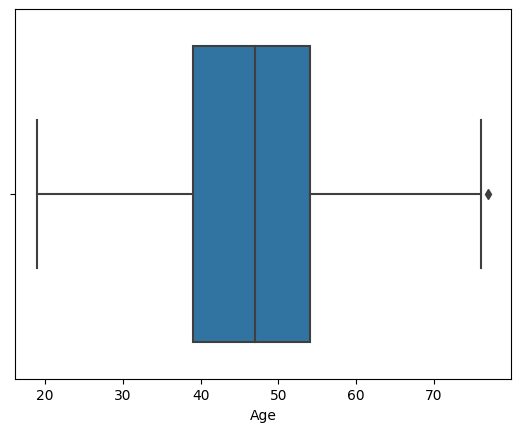

In [210]:
# Membuat boxplot age
sns.boxplot(data=df_baru, x="Age")

<Axes: xlabel='ALB', ylabel='count'>

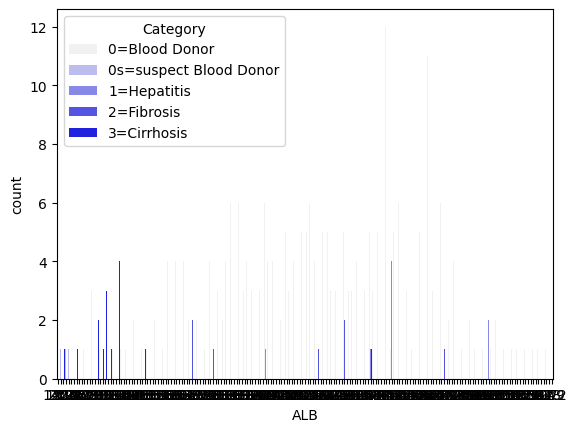

In [211]:
# Membuat visualisasi countplot ALB dengan category
sns.countplot(data=df_baru, x="ALB", hue="Category", color="blue" )

<Axes: >

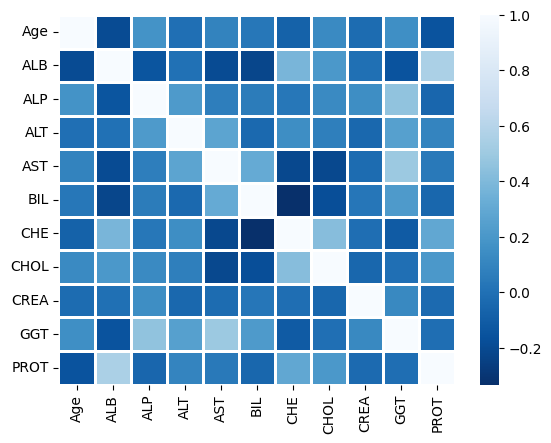

In [212]:
# Membuat visualisasi heatmap untuk Setiap variabel numerik yang ada
sns.heatmap(df_baru.corr(),  cmap ="Blues_r", linecolor ="white", lw=2 )

##### Visualisasi Relationship

<Axes: xlabel='Age', ylabel='ALB'>

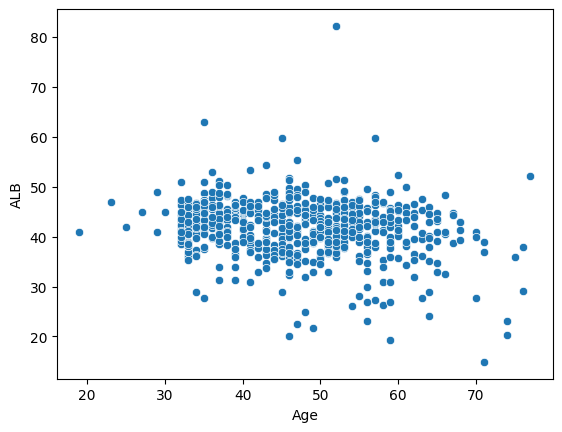

In [213]:
# Membuat scatterplot untuk Age dan ALB
sns.scatterplot(data=df_baru,x="Age",y="ALB")

##### Visualisasi Composition




In [214]:
# Membuat pieplotCategory 
px.pie(df_baru, names="Category")

## **Data Preparation**

In [215]:
# digunakan untuk mengecek apakah ada nilai yang kosong pada dataframe (melihat summary null value)
df_baru.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [216]:
# Encoding
# Merubah tipe data string/kategori menjadi numerik
df3 = pd.get_dummies(df_baru, columns = ['Category', 'Sex'])
df3

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1,0,0,0,0,0,1
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1,0,0,0,0,0,1
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1,0,0,0,0,0,1
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1,0,0,0,0,0,1
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0,0,0,0,1,1,0
611,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0,0,0,0,1,1,0
612,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0,0,0,0,1,1,0
613,46,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0,0,0,0,1,1,0


In [217]:
# split data 
from sklearn.model_selection import train_test_split
x = df2.drop('Unnamed: 0',axis=1)
y = df2['Unnamed: 0']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

          Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL  CREA   GGT  PROT
296  0=Blood Donor   64   m  44.5  87.8  15.1  23.2  12.3   9.49  7.70  78.0  20.0  74.3
554    1=Hepatitis   44   m  49.0  27.3  40.2  31.1  13.0   8.91  4.07  81.5  27.6  72.8
443  0=Blood Donor   49   f  34.9  37.9  15.3  19.4   7.1   5.30  5.88  83.0   7.9  62.5
301  0=Blood Donor   65   m  39.1  45.8  23.1  27.5   6.4   7.00  6.23  73.0  27.1  64.3
247  0=Blood Donor   55   m  47.6  71.9  25.8  24.5   5.8   9.24  4.63  83.0  29.1  76.7
..             ...  ...  ..   ...   ...   ...   ...   ...    ...   ...   ...   ...   ...
71   0=Blood Donor   38   m  39.9  62.9  71.7  43.9  10.4  10.90  7.01  99.0  88.3  73.1
106  0=Blood Donor   41   m  44.7  74.9  25.2  20.2   6.3  10.34  4.23  74.0  23.7  72.1
270  0=Blood Donor   59   m  39.8  49.4  25.4  21.4  24.7   7.50  3.69  86.0  18.7  71.9
435  0=Blood Donor   48   f  44.4  52.5  16.4  23.4   4.5   9.06  6.78  74.0  10.3  73.1
102  0=Blood Donor   

In [218]:
# digunakan untuk menampilkan contoh data secara acak
sample = df_baru.sample()
sample

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
142,0=Blood Donor,45,m,43.2,68.2,27.8,42.3,6.6,10.93,6.61,105.0,27.2,74.5
